## ¿ Existe una relación entre el nivel de descuento aplicado a un producto y si clasificación promedio por parte de los usuarios?

## Entender esta relacion permite evaluar si las estrategias de descuento están asociadas a una mejor percepcion del producto o si, por el contrario, los descuentos se concentran en productos con menor validacion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Carga del dataset limpio

In [2]:
# Carga del dataset limpio
df = pd.read_csv("../data/processed/amazon_clean_v1.csv")
# Vista general
df.head()

,id_producto,nombre_producto,categoria,descuento_precio,precio_actual,porcentaje_descuento,calificacion,recuento_calificaciones,detalle_producto,id_usuario,nombre_usuario,id_de_revision,titulo_resenia,contenido_revision,link_imagen,link_producto,outlier_precio,diferencia_precio,tiene_descuento
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,False,700.0,True
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,False,150.0,True
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,False,1700.0,True
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,False,370.0,True
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,False,245.0,True


## 2. Selección de variables relevantes (Columnas)

In [3]:
cols = ["porcentaje_descuento", "calificacion", "recuento_calificaciones", "outlier_precio"]

df_a = df[cols].copy()

### El análisis se centra en descuento, clasificacion y volumen de reseñas.

## 3. Validaciones específicas para este análisis

In [4]:
round(df_a[["porcentaje_descuento", "calificacion"]].describe(),2)

,porcentaje_descuento,calificacion
count,1465.00,1465.00
mean,47.69,3.97
std,21.64,0.75
min,0.00,0.20
25%,32.00,3.90
50%,50.00,4.10
75%,63.00,4.30
max,94.00,5.00


In [5]:
df_a['suficientes_reseñas'] = df_a['recuento_calificaciones'] >= 50

La calificación promedio de productos con pocas reseñas puede no ser representativa. Por este motivo, voy a analizar reslustados considerando el volumen de calificaciones

## 4. Análisis exploratorio (EDA)

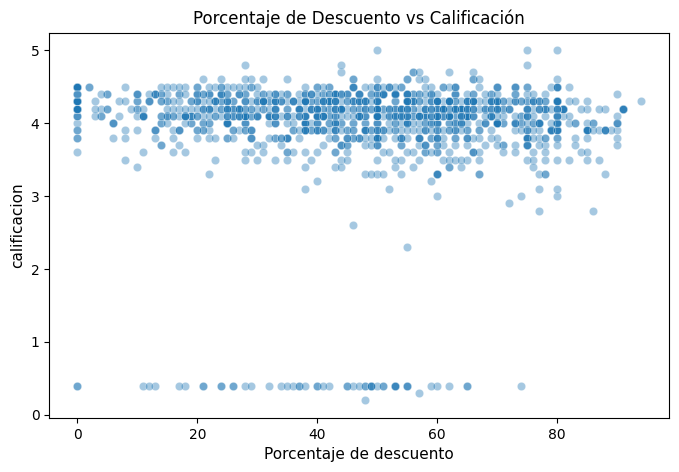

In [6]:
# Scatter básico
plt.figure(figsize=(8,5))
sns.scatterplot(data = df_a, x = 'porcentaje_descuento', y = 'calificacion', alpha = 0.4)
plt.xlabel("Porcentaje de descuento", fontsize = 11)
plt.ylabel("calificacion", fontsize = 11)
plt.title("Porcentaje de Descuento vs Calificación")
plt.show()

Observacion:
* Alta concentracion entre 3.5 y 4.5 de clasificacion, independientemente del nivel de descuento.

* No se observa una relacion lineal evidente:
    - A mayor descuento no hay aumento claro de la clasificación.
    - Tampoco caída abrupta.

* Ligera mayor dispersión en descuentos altos (60-90%)
    - Aparecen mas calificaciones bajas.
    - No es dominante, pero existe.

* Presencia de calificaciones cercanas a 0:
    - Casos atípicos.
    - Probablemente productos con poca reseñas.

## 4.1 Correlación

In [7]:
df_a[["porcentaje_descuento", "calificacion"]].corr()

,porcentaje_descuento,calificacion
porcentaje_descuento,1.000000,0.000524
calificacion,0.000524,1.000000


No existe ninguna relación entre el porcentaje de descuento de un producto y la calificación.

Son dos variables completamente independientes. Saber el descuento de un porcucto no te da ninguna pista sobre si será bin o mal certificado por los clientes.

## 4.2 Segmentación por niveles de descuento

In [8]:
# Creo los limites de las categorias.
bins = [0, 10, 30, 60, 100]
# Asignando un nombre a cada una de las categorias de los bins
labels = ['Bajo', 'Medio', 'Alto', 'Muy alto']

# Creando el corte con la funcion cut.
df_a['nivel_descuento'] = pd.cut(df_a['porcentaje_descuento'], bins = bins, labels = labels)

In [9]:
# Calcular la media de la calificación para cada categoría de descuento
df_a.groupby('nivel_descuento')['calificacion'].mean()

/tmp/ipykernel_10446/3474720569.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_a.groupby('nivel_descuento')['calificacion'].mean()


nivel_descuento
Bajo        4.160000
Medio       3.969231
Alto        3.903959
Muy alto    4.029841
Name: calificacion, dtype: float64

- Aunque no hay una correlación directa, si existe un patrón comppleto. Los descuentos moderados y altos se asocian con ligeramente menores calificaciones.
- Los descuentos altos no siguen esta regla y se asocian con calificaciones buenas.
- Los descuentos bajos tienen mejor calificacion que el resto

## 4.3 Robustez: Solo productos con suficientes reseñas

In [10]:
df_filtado = df_a[df_a['suficientes_reseñas']]
df_filtado.groupby('nivel_descuento')['calificacion'].mean()

/tmp/ipykernel_10446/436881761.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtado.groupby('nivel_descuento')['calificacion'].mean()


nivel_descuento
Bajo        4.161765
Medio       3.971815
Alto        3.911568
Muy alto    4.037237
Name: calificacion, dtype: float64

In [11]:
df_sin_outliers = df_a[~df_a['outlier_precio']]
df_sin_outliers[['porcentaje_descuento', 'calificacion']].corr()

,porcentaje_descuento,calificacion
porcentaje_descuento,1.000000,0.010357
calificacion,0.010357,1.000000


## Conclusiones:

* No se observa una relación lineal fuerte entre el porcentaje de descuento y la calificación promedio

* Los productos con descuentos mas bajos tienden a mostrar calificaciones ligereamente mayores que las demas.

* Esta diferencia se atenúa al considerar únicamente productos con mayor volumen de reseñas.

* Los outliers de precio no alteran sustancialmente los resultados